In [15]:
import numpy as np
import xarray as xr
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

In [16]:
diffusion = Analytic(lambda x, y: 1)
diffusion.set_partial_x(lambda x, y: 0)
diffusion.set_partial_y(lambda x, y: 0)

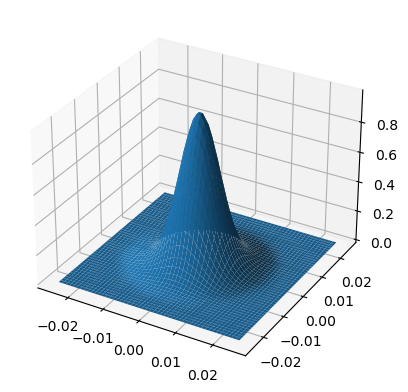

In [17]:
n_grid = 50
n_time = 400
dt = 0.000001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  1*np.exp(- (X**2 + Y**2)/(0.001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [18]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)
result_ds

<xarray.DataArray 'concentration' (x: 50, y: 50, t: 400)>
array([[[ 1.38879439e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 9.83506169e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        ...,
        [ 9.83506169e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 1.38879439e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000]],

       [[ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 1.02533352e-010,  4.92346270e-010,  1.97031366e-009, ...,
          3.51789636e+250, -1.66707918e+251,  7.90015007e+251],
        [ 2.67233371e-010,  1.25987671e-009,  5.39030557e-009, ...,
         -6.96638959e+250,  3.30132522e+251, -1.56449696e+252],
...
        [ 2.67233371e-010,  1.25987671e-009,  5.39030557e-009, ...,
         -6.75891010e+250,  3.20246833e+251, -1.51739567e+252],
        [ 1.02533352e-010,  4.92346270e-010,  1.97031366e-009, ...,
          3.41382960e+250, -1.61749407e+251,  7.66389318e+251],
        [ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000]],

       [[ 1.38879439e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 9.83506169e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        ...,
        [ 9.83506169e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 3.77356255e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
        [ 1.38879439e-011,  0.00000000e+000,  0.00000000e+000, ...,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000]]])
Coordinates:
  * x        (x) float64 -0.025 -0.02398 -0.02296 ... 0.02296 0.02398 0.025
  * y        (y) float64 -0.025 -0.02398 -0.02296 ... 0.02296 0.02398 0.025
  * t        (t) float64 0.0 1.003e-06 2.005e-06 ... 0.000398 0.000399 0.0004
Attributes:
    dx:                     0.0010204081632653062
    dy:                     0.0010204081632653062
    dt:                     1.0025062656641603e-06
    n_grid:                 50
    n_time:                 400
    initial_condition:      [[1.38879439e-11 3.77356255e-11 9.83506169e-11 .....
    diffusion_coefficient:  1
    metadata:               Generated by forward_euler_final

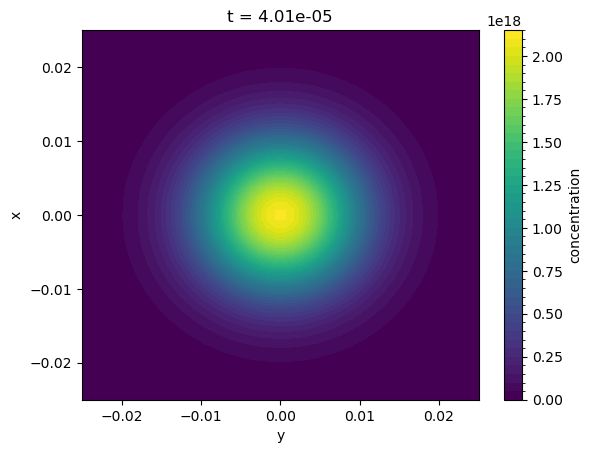

In [19]:
xr.plot.contourf(result_ds.isel(t=40), levels=50)


In [20]:
fig, ax = plot_mass_conservation(result_ds)

TypeError: 'int' object is not subscriptable